# VGG-16
Explored the architecture in detail, The notebook just needs changes while importing a specific file.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [101]:
import tensorflow as tf

In [102]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model


In [103]:
input  = Input(shape=(224,224,3))

#First Conv block
x = Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu')(input)
x = Conv2D(filters=64, kernel_size = 3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size = 2, strides=2, padding='same')(x)

#Second Conv block
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

#Third Conv block
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

#Fourth Conv Block
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

#Fifthe Conv Block
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=512, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)

#Fully Connected Layers
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)

output = Dense(units = 1000, activation='softmax')(x)

In [104]:
model = Model(inputs = input, outputs = output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0   

In [105]:
#vgg implementation using Keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [106]:
!ls

__notebook_source__.ipynb


In [107]:
model_pretrained = VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [108]:
model_pretrained.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

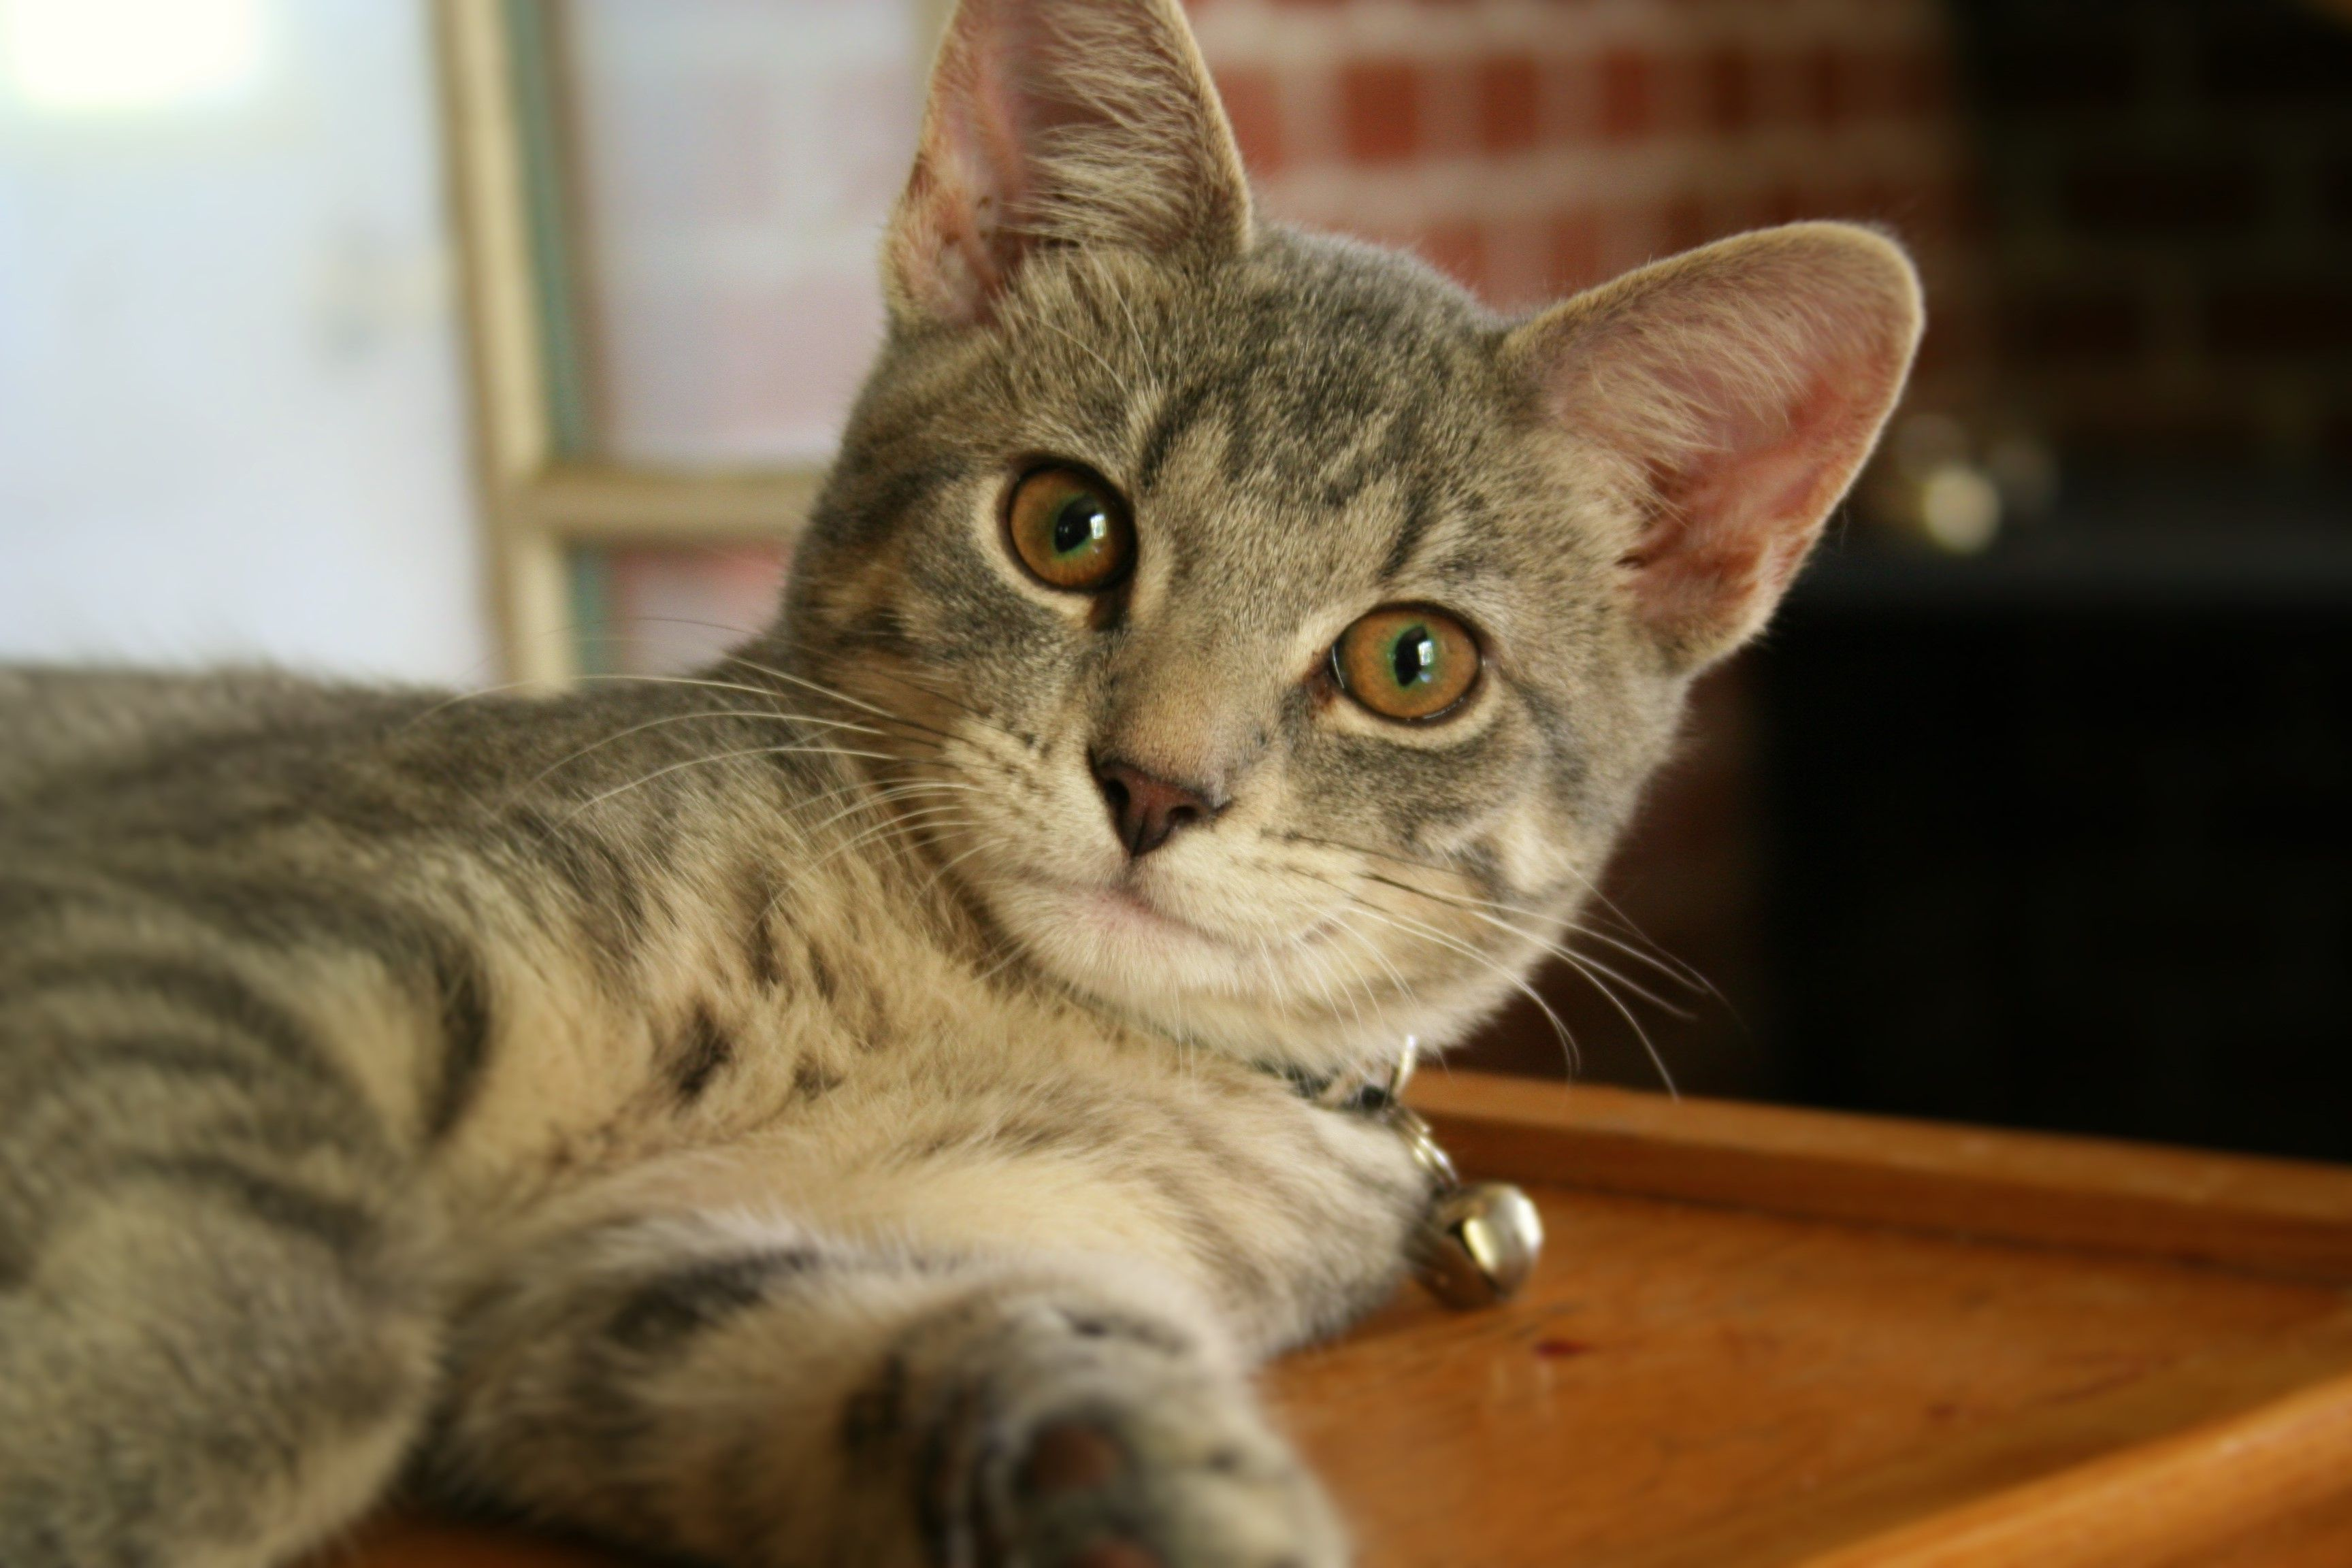

In [109]:
from IPython.display import Image
Image("/kaggle/input/catimage/cat.jpg", width=224, height=224)

In [110]:
from keras.preprocessing.image import load_img
image=load_img('/kaggle/input/catimage/cat.jpg',target_size=(224,224))



In [111]:
from keras.preprocessing.image import img_to_array

image = img_to_array(image)
image.shape

(224, 224, 3)

In [112]:
image = np.expand_dims(image, axis=0)
image.shape

(1, 224, 224, 3)

In [113]:
image = preprocess_input(image)
image.shape

(1, 224, 224, 3)

In [114]:
features = model_pretrained.predict(image)
from keras.applications.vgg16 import decode_predictions
result = decode_predictions(features)

In [115]:
print(result[0][0])

('n02124075', 'Egyptian_cat', 0.91857964)


In [116]:
print(result)

[[('n02124075', 'Egyptian_cat', 0.91857964), ('n02123045', 'tabby', 0.044593144), ('n02123159', 'tiger_cat', 0.027272893), ('n02127052', 'lynx', 0.002316377), ('n04074963', 'remote_control', 0.0006674328)]]
